In [1]:
from matminer.datasets import load_dataset

df = load_dataset('elastic_tensor_2015', data_home='.')
df

,material_id,formula,nsites,space_group,volume,structure,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,compliance_tensor,elastic_tensor,elastic_tensor_original,cif,kpoint_density,poscar
0,mp-10003,Nb4CoSi,12,124,194.419802,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,"[[0.004385293093993, -0.0016070693558990002, -...","[[311.33514638650246, 144.45092552856926, 126....","[[311.33514638650246, 144.45092552856926, 126....",#\#CIF1.1\n###################################...,7000,Nb8 Co2 Si2\n1.0\n6.221780 0.000000 0.000000\n...
1,mp-10010,Al(CoSi)2,5,164,61.987320,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,"[[0.0037715428949660003, -0.000844229828709, -...","[[306.93357350984974, 88.02634955100905, 105.6...","[[306.93357350984974, 88.02634955100905, 105.6...",#\#CIF1.1\n###################################...,7000,Al1 Co2 Si2\n1.0\n3.932782 0.000000 0.000000\n...
2,mp-10015,SiOs,2,221,25.952539,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,"[[0.0019959391925840004, -0.000433146670736000...","[[569.5291276937579, 157.8517489654999, 157.85...","[[569.5291276937579, 157.8517489654999, 157.85...",#\#CIF1.1\n###################################...,7000,Si1 Os1\n1.0\n2.960692 0.000000 0.000000\n0.00...
3,mp-10021,Ga,4,63,76.721433,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,"[[0.021647143908635, -0.005207263618160001, -0...","[[69.28798774976904, 34.7875015216915, 37.3877...","[[70.13259066665267, 40.60474945058445, 37.387...",#\#CIF1.1\n###################################...,7000,Ga4\n1.0\n2.803229 0.000000 0.000000\n0.000000...
4,mp-10025,SiRu2,12,62,160.300999,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,"[[0.00410214297725, -0.001272204332729, -0.001...","[[349.3767766177825, 186.67131003104407, 176.4...","[[407.4791016459293, 176.4759188081947, 213.83...",#\#CIF1.1\n###################################...,7000,Si4 Ru8\n1.0\n4.037706 0.000000 0.000000\n0.00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,mp-9961,Ti2CdC,8,194,121.520152,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",2.229538,43.697362,53.329789,62.962216,110.397752,111.788114,113.178476,0.294196,"[[0.0044568832753350005, -0.001136458158149, -...","[[250.07723993082595, 71.61036453717465, 44.31...","[[250.07723993082595, 71.61036453717465, 44.31...",#\#CIF1.1\n###################################...,7000,Ti4 Cd2 C2\n1.0\n3.103427 0.000000 0.000000\n-...
1177,mp-9969,ScSi,8,63,145.392095,"[[0. 8.53417539 0.91740975] Sc, [0. ...",0.635889,66.067578,70.253182,74.438787,101.207608,101.326807,101.446005,0.218412,"[[0.007188192080993001, -0.000983458215036, -0...","[[172.01931871370775, 43.38593006033102, 76.22...","[[172.01931871370775, 43.38593006033102, 76.22...",#\#CIF1.1\n###################################...,7000,Sc4 Si4\n1.0\n3.996960 0.000000 0.000000\n0.00...
1178,mp-9972,YSi,8,63,174.123748,"[[0. 9.084549 0.960921] Y, [0. 1.4...",0.454691,62.326766,65.160458,67.994149,89.416354,89.418161,89.419968,0.206850,"[[0.007749056578454001, -0.001293580144074, -0...","[[159.44792354820547, 42.19645554837514, 66.58...","[[159.44792354820547, 42.19645554837514, 66.58...",#\#CIF1.1\n###################################...,7000,Y4 Si4\n1.0\n4.286685 0.000000 0.000000\n0.000...
1179,mp-998,Al2Cu,12,140,179.147816,"[[5.11035838 2.07486738 0. ] Al, [3.996...",0.735449,37.457129,40.211802,42.966475,99.383115,99.384565,99.386015,0.321738,"[[0.007456839159427001, -0.002592061077082, -0...","[[170.12510286354689, 70.6116049091726, 57.026...","[[170.12510286354689, 70.6116049091726, 57.026.

In [2]:
to_keep = ['formula', 'structure', 'K_VRH'] #formula中元素数量不同，输入的df形状不同，可以使用magpie进行特征化，保证输入长度一致
df = df[to_keep]
df

,formula,structure,K_VRH
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081
...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565


In [3]:
from matminer.featurizers.conversions import StrToComposition #将formula特征化
df = StrToComposition().featurize_dataframe(df, 'formula')
df

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)"
...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,"(Ti, Cd, C)"
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,"(Sc, Si)"
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,"(Y, Si)"
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,"(Al, Cu)"


In [4]:
from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name='magpie')
df = ep_feat.featurize_dataframe(df, col_id = 'composition')
df

ElementProperty:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,1.548471,0.258079,0.430131,0.000000,194.0,229.0,35.0,222.833333,9.611111,229.0
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,1.548471,0.619388,0.743266,0.000000,194.0,227.0,33.0,213.400000,15.520000,194.0
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.000000,0.000000,64.0,64.0,0.0,64.000000,0.000000,64.0
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,205.000000,14.666667,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,11.750000,22.0,...,0.000023,0.000011,0.000011,0.000023,194.0,194.0,0.0,194.000000,0.000000,194.0
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,"(Sc, Si)",14.0,21.0,7.0,17.500000,3.500000,14.0,...,0.000006,0.000003,0.000003,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,"(Y, Si)",14.0,39.0,25.0,26.500000,12.500000,14.0,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,"(Al, Cu)",13.0,29.0,16.0,18.333333,7.111111,13.0,...,0.000000,0.000000,0.000000,0.000000,225.0,225.0,0.0,225.000000,0.000000,225.0


In [5]:
from matminer.featurizers.conversions import CompositionToOxidComposition

df = CompositionToOxidComposition().featurize_dataframe(df, 'composition')
df

CompositionToOxidComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,0.258079,0.430131,0.000000,194.0,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,0.619388,0.743266,0.000000,194.0,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.000000,64.0,64.0,0.0,64.000000,0.000000,64.0,(Ga0+)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.000000,194.0,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,11.750000,22.0,...,0.000011,0.000011,0.000023,194.0,194.0,0.0,194.000000,0.000000,194.0,"(Ti0+, Cd0+, C0+)"
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,"(Sc, Si)",14.0,21.0,7.0,17.500000,3.500000,14.0,...,0.000003,0.000003,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Sc0+, Si0+)"
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,"(Y, Si)",14.0,39.0,25.0,26.500000,12.500000,14.0,...,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Y0+, Si0+)"
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,"(Al, Cu)",13.0,29.0,16.0,18.333333,7.111111,13.0,...,0.000000,0.000000,0.000000,225.0,225.0,0.0,225.000000,0.000000,225.0,"(Al0+, Cu0+)"


In [6]:
from matminer.featurizers.composition import OxidationStates

os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, 'composition_oxid')
df

OxidationStates:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,64.0,0.0,64.000000,0.000000,64.0,(Ga0+),0,0,0,0.000000
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,11.750000,22.0,...,194.0,0.0,194.000000,0.000000,194.0,"(Ti0+, Cd0+, C0+)",0,0,0,0.000000
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,"(Sc, Si)",14.0,21.0,7.0,17.500000,3.500000,14.0,...,227.0,33.0,210.500000,16.500000,194.0,"(Sc0+, Si0+)",0,0,0,0.000000
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,"(Y, Si)",14.0,39.0,25.0,26.500000,12.500000,14.0,...,227.0,33.0,210.500000,16.500000,194.0,"(Y0+, Si0+)",0,0,0,0.000000
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,"(Al, Cu)",13.0,29.0,16.0,18.333333,7.111111,13.0,...,225.0,0.0,225.000000,0.000000,225.0,"(Al0+, Cu0+)",0,0,0,0.000000


In [7]:
from matminer.featurizers.structure import DensityFeatures

df_feat = DensityFeatures()
df = df_feat.featurize_dataframe(df, 'structure')
df

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000,7.834556,16.201654,0.688834
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983,5.384968,12.397466,0.644386
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854,13.968635,12.976265,0.569426
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,64.0,(Ga0+),0,0,0,0.000000,6.036267,19.180359,0.479802
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641,9.539514,13.358418,0.598395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,11.750000,22.0,...,0.000000,194.0,"(Ti0+, Cd0+, C0+)",0,0,0,0.000000,6.016734,15.190017,0.658712
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,"(Sc, Si)",14.0,21.0,7.0,17.500000,3.500000,14.0,...,16.500000,194.0,"(Sc0+, Si0+)",0,0,0,0.000000,3.336856,18.174013,0.625414
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,"(Y, Si)",14.0,39.0,25.0,26.500000,12.500000,14.0,...,16.500000,194.0,"(Y0+, Si0+)",0,0,0,0.000000,4.462773,21.765469,0.689264
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,"(Al, Cu)",13.0,29.0,16.0,18.333333,7.111111,13.0,...,0.000000,225.0,"(Al0+, Cu0+)",0,0,0,0.000000,4.356814,14.928982,0.595452


In [8]:
y = df['K_VRH'].values
excluded = ['K_VRH', 'formula', 'structure', 'composition', 'composition_oxid']
X = df.drop(excluded, axis = 1)

print('There are %s possible descriptor: \n'%X.shape[1])

There are 139 possible descriptor: 



In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

dt = DecisionTreeRegressor()
dt.fit(X, y)

print('training R2 =' + str(round(dt.score(X,y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y,
                                                          y_pred = dt.predict(X))))

training R2 =1.0
training RMSE = 0.000


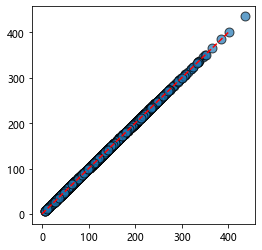

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot([0,400], [0, 400], 'r--')
plt.scatter(y, dt.predict(X), s = 80, edgecolor = 'k', alpha = 0.7)
plt.show()

In [12]:
dt2 = DecisionTreeRegressor(max_depth = 5)
dt2.fit(X, y)

print('training R2 =' + str(round(dt2.score(X,y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y,
                                                          y_pred = dt2.predict(X))))

training R2 =0.891
training RMSE = 24.043


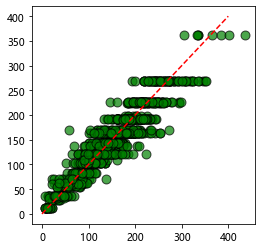

In [13]:
plt.figure(figsize=(4, 4))
plt.plot([0,400], [0, 400], 'r--')
plt.scatter(y, dt2.predict(X), s = 80, c = 'g', edgecolor = 'k', alpha = 0.7)
plt.show()

In [14]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True)
r2_scores = cross_val_score(dt, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores = cross_val_score(dt, X, y, scoring='neg_root_mean_squared_error',
                              cv=crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores), np.mean(r2_scores)))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Cross-validation results:
Folds: 10, mean R2: 0.868
Folds: 10, mean RMSE: 25.871


In [15]:
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_scores = cross_val_score(dt2, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores = cross_val_score(dt2, X, y, scoring='neg_root_mean_squared_error',
                              cv=crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores), np.mean(r2_scores)))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Cross-validation results:
Folds: 10, mean R2: 0.822
Folds: 10, mean RMSE: 30.313


In [16]:
from sklearn.model_selection import cross_val_predict

y_cv = cross_val_predict(dt, X, y, cv = crossvalidation)
y_cv

array([189.90954591, 132.96648955, 246.26973796, ..., 101.32680668,
        90.1242459 ,  63.60462977])

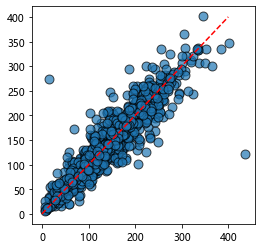

In [17]:
plt.figure(figsize = (4, 4))
plt.plot([0, 400], [0,400], 'r--')
plt.scatter(y, y_cv, s = 80, edgecolor = 'k', alpha = 0.7)
plt.show()

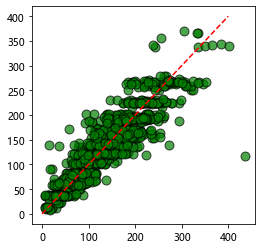

In [18]:
plt.figure(figsize=(4, 4))
plt.plot([0,400],[0,400],'r--')
plt.scatter(y, cross_val_predict(dt2, X, y, cv=crossvalidation),
            s = 80, c = 'g', edgecolor = 'k', alpha = 0.7)
plt.show()